# Maxima and minima seeking

Equation: 3 * x**2 + 2 * x + 1


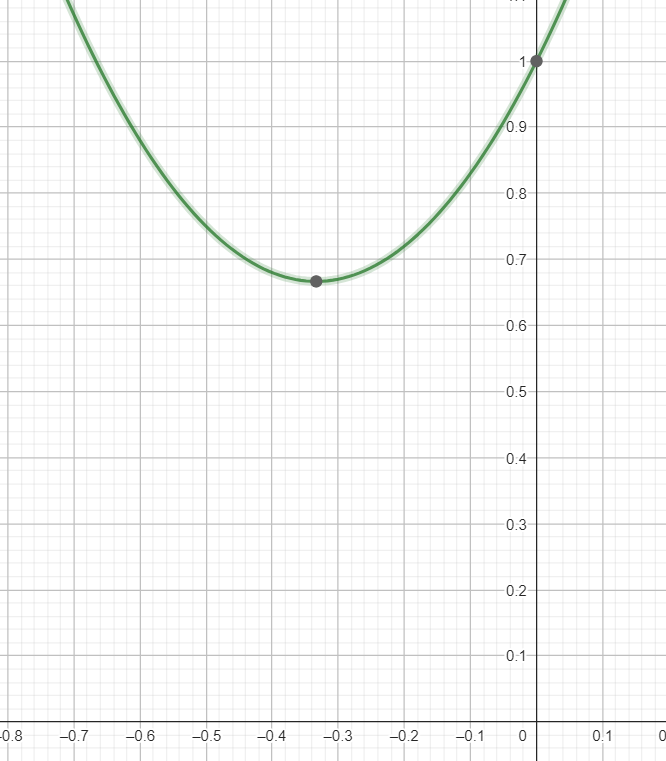

## Gradient descent
This algorithm takes the derivative of the function and descends upon it until it equals 0

In [5]:
import numpy as np

def gradient_descent(gradient, initial_x, learning_rate, n_iterations):
    x = initial_x
    for i in range(n_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        print(f"Iteration {i+1}: x = {x}, f(x) = {3*x**2 + 2*x + 1}")
    return x

def gradient(x):
    return 6*x + 2

initial_x = 5
learning_rate = 0.1
n_iterations = 100

# Run gradient descent
min_x = gradient_descent(gradient, initial_x, learning_rate, n_iterations)

print(f"\nThe minimum value of the function is at x = {min_x}")


Iteration 1: x = 1.7999999999999998, f(x) = 14.319999999999999
Iteration 2: x = 0.5199999999999998, f(x) = 2.851199999999999
Iteration 3: x = 0.007999999999999896, f(x) = 1.0161919999999998
Iteration 4: x = -0.19680000000000003, f(x) = 0.7225907199999999
Iteration 5: x = -0.27872, f(x) = 0.6756145151999999
Iteration 6: x = -0.31148800000000004, f(x) = 0.6680983224320001
Iteration 7: x = -0.32459520000000003, f(x) = 0.66689573158912
Iteration 8: x = -0.32983808000000003, f(x) = 0.6667033170542592
Iteration 9: x = -0.331935232, f(x) = 0.6666725307286815
Iteration 10: x = -0.3327740928, f(x) = 0.666667604916589
Iteration 11: x = -0.33310963712, f(x) = 0.6666668167866543
Iteration 12: x = -0.333243854848, f(x) = 0.6666666906858647
Iteration 13: x = -0.3332975419392, f(x) = 0.6666666705097384
Iteration 14: x = -0.33331901677568, f(x) = 0.6666666672815581
Iteration 15: x = -0.333327606710272, f(x) = 0.6666666667650494
Iteration 16: x = -0.3333310426841088, f(x) = 0.6666666666824079
Iteration

## Euler's Method
Similar to gradient descent, this takes the diferential equation dx/dt = 6 * x + 2 in order to descend the gradient. (euler's method works the same as gradient descent in optimizaiton problems, diferring only in differential equations)

In [7]:
def euler_method(derivative, initial_x, learning_rate, n_iterations):
    x = initial_x
    for i in range(n_iterations):
        dx_dt = derivative(x)
        x = x - learning_rate * dx_dt
        print(f"Iteration {i+1}: x = {x}, f(x) = {3*x**2 + 2*x + 1}")
    return x

def derivative(x):
    return 6 * x + 2


initial_x = 5
learning_rate = 0.1
n_iterations = 100


min_x = euler_method(derivative, initial_x, learning_rate, n_iterations)

print(f"\nThe minimum value of the function is at x = {min_x}")


Iteration 1: x = 1.7999999999999998, f(x) = 14.319999999999999
Iteration 2: x = 0.5199999999999998, f(x) = 2.851199999999999
Iteration 3: x = 0.007999999999999896, f(x) = 1.0161919999999998
Iteration 4: x = -0.19680000000000003, f(x) = 0.7225907199999999
Iteration 5: x = -0.27872, f(x) = 0.6756145151999999
Iteration 6: x = -0.31148800000000004, f(x) = 0.6680983224320001
Iteration 7: x = -0.32459520000000003, f(x) = 0.66689573158912
Iteration 8: x = -0.32983808000000003, f(x) = 0.6667033170542592
Iteration 9: x = -0.331935232, f(x) = 0.6666725307286815
Iteration 10: x = -0.3327740928, f(x) = 0.666667604916589
Iteration 11: x = -0.33310963712, f(x) = 0.6666668167866543
Iteration 12: x = -0.333243854848, f(x) = 0.6666666906858647
Iteration 13: x = -0.3332975419392, f(x) = 0.6666666705097384
Iteration 14: x = -0.33331901677568, f(x) = 0.6666666672815581
Iteration 15: x = -0.333327606710272, f(x) = 0.6666666667650494
Iteration 16: x = -0.3333310426841088, f(x) = 0.6666666666824079
Iteration

## Evolutionary algorithm
Creates a population of possible solutions within an interval, selecting only the ones which have the lowest values as "parents" from which a new interval will be created to reiterate the function.

In [9]:
import random

def objective_function(x):
    return 3 * x**2 + 2 * x + 1

def generate_individual():
    return random.uniform(-10, 10)

def generate_population(size):
    return [generate_individual() for _ in range(size)]

def evaluate_population(population):
    return [objective_function(individual) for individual in population]

def selection(population, fitness, num_parents):
    selected = []
    for _ in range(num_parents):
        idx1, idx2 = random.sample(range(len(population)), 2)
        if fitness[idx1] < fitness[idx2]:
            selected.append(population[idx1])
        else:
            selected.append(population[idx2])
    return selected

def crossover(parent1, parent2):
    alpha = random.uniform(0, 1)
    return alpha * parent1 + (1 - alpha) * parent2

def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        individual += random.uniform(-1, 1)
    return individual

def genetic_algorithm(pop_size, n_generations, mutation_rate):
    population = generate_population(pop_size)

    for generation in range(n_generations):
        fitness = evaluate_population(population)

        parents = selection(population, fitness, pop_size // 2)

        new_population = []
        while len(new_population) < pop_size:
            parent1, parent2 = random.sample(parents, 2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

        best_individual = min(population, key=objective_function)
        best_fitness = objective_function(best_individual)
        print(f"Generation {generation+1}: Best x = {best_individual}, f(x) = {best_fitness}")

    return min(population, key=objective_function)

pop_size = 20
n_generations = 100
mutation_rate = 0.1

best_solution = genetic_algorithm(pop_size, n_generations, mutation_rate)

print(f"\nThe minimum value of the function is at x = {best_solution}")


Generation 1: Best x = -0.5158502491178174, f(x) = 0.766603940309108
Generation 2: Best x = -0.4458683732591067, f(x) = 0.704659072299953
Generation 3: Best x = -0.37294124385994964, f(x) = 0.67137302639552
Generation 4: Best x = -0.34519258063954855, f(x) = 0.6670885919066766
Generation 5: Best x = -0.338323358939304, f(x) = 0.6667413677333114
Generation 6: Best x = -0.2836976942721178, f(x) = 0.6740577566617125
Generation 7: Best x = -0.3201108995548192, f(x) = 0.6671911649317482
Generation 8: Best x = -0.3362013046227964, f(x) = 0.6666913424446183
Generation 9: Best x = -0.3242330283063555, f(x) = 0.6669151133214188
Generation 10: Best x = -0.31486152079240765, f(x) = 0.667690290242308
Generation 11: Best x = -0.314286027975971, f(x) = 0.6677550661907965
Generation 12: Best x = -0.31428602797597094, f(x) = 0.6677550661907965
Generation 13: Best x = -0.3135383625131479, f(x) = 0.6678421892759827
Generation 14: Best x = -0.3133579668679782, f(x) = 0.6678637124629424
Generation 15: Bes

## Particle swarm optimization
Similar to the evolutionary algorithm, instead of creating a new interval from several parents, this algorithm has a swarm of particles (x values) and attracts all of the particles to that of lowest y value.

In [15]:
def objective_function(x):
    return 3 * x**2 + 2 * x + 1

def initialize_particles(n_particles, x_min, x_max):
    particles = []
    for _ in range(n_particles):
        position = random.uniform(x_min, x_max)
        velocity = random.uniform(-1, 1)
        particles.append({'position': position, 'velocity': velocity, 'best_position': position})
    return particles

def update_particles(particles, global_best_position, w, c1, c2):
    for particle in particles:
        r1 = random.random()
        r2 = random.random()
        particle['velocity'] = (w * particle['velocity'] +
                                c1 * r1 * (particle['best_position'] - particle['position']) +
                                c2 * r2 * (global_best_position - particle['position']))
        particle['position'] += particle['velocity']

        if objective_function(particle['position']) < objective_function(particle['best_position']):
            particle['best_position'] = particle['position']

def particle_swarm_optimization(n_particles, n_iterations, x_min, x_max, w, c1, c2):
    particles = initialize_particles(n_particles, x_min, x_max)

    global_best_position = min(particles, key=lambda p: objective_function(p['position']))['position']

    for iteration in range(n_iterations):
        update_particles(particles, global_best_position, w, c1, c2)

        current_best_position = min(particles, key=lambda p: objective_function(p['position']))['position']
        if objective_function(current_best_position) < objective_function(global_best_position):
            global_best_position = current_best_position

        print(f"Iteration {iteration+1}: Best x = {global_best_position}, f(x) = {objective_function(global_best_position)}")

    return global_best_position

n_particles = 3     # Número de partículas en el enjambre
n_iterations = 100  # Número de iteraciones
x_min = -10         # Límite inferior del espacio de búsqueda
x_max = 10          # Límite superior del espacio de búsqueda
w = 0.5             # Inercia
c1 = 1.5            # Coeficiente cognitivo (atracción hacia la mejor posición personal)
c2 = 1.5            # Coeficiente social (atracción hacia la mejor posición global)

best_solution = particle_swarm_optimization(n_particles, n_iterations, x_min, x_max, w, c1, c2)

print(f"\nThe minimum value of the function is at x = {best_solution}")

Iteration 1: Best x = 0.08810681554575162, f(x) = 1.1995020639283425
Iteration 2: Best x = -0.11385975504092993, f(x) = 0.8111726213720818
Iteration 3: Best x = -0.4002050346084878, f(x) = 0.6800821399609671
Iteration 4: Best x = -0.4002050346084878, f(x) = 0.6800821399609671
Iteration 5: Best x = -0.4002050346084878, f(x) = 0.6800821399609671
Iteration 6: Best x = -0.3019093715872166, f(x) = 0.6696290627821309
Iteration 7: Best x = -0.36070173013756296, f(x) = 0.6689137540975679
Iteration 8: Best x = -0.36070173013756296, f(x) = 0.6689137540975679
Iteration 9: Best x = -0.34299534214071653, f(x) = 0.6669467299092485
Iteration 10: Best x = -0.34299534214071653, f(x) = 0.6669467299092485
Iteration 11: Best x = -0.34299534214071653, f(x) = 0.6669467299092485
Iteration 12: Best x = -0.34299534214071653, f(x) = 0.6669467299092485
Iteration 13: Best x = -0.34299534214071653, f(x) = 0.6669467299092485
Iteration 14: Best x = -0.34299534214071653, f(x) = 0.6669467299092485
Iteration 15: Best x

## Simulated annealing algorithm
Inspired on the physics of cooling materials, this algorithm creates a set of points randomly within an interval that starts decreasing with each iteration. This allows for the selection of "worse" solutions, which in turn, get the function closer to a global extreme instead of getting stuck in a local one (like gradient descent)

In [12]:
import math

def objective_function(x):
    return 3 * x**2 + 2 * x + 1

def generate_neighbor(current_x, step_size):
    return current_x + random.uniform(-step_size, step_size)

def simulated_annealing(initial_x, initial_temp, cooling_rate, step_size, n_iterations):
    current_x = initial_x
    current_temp = initial_temp
    best_x = current_x
    best_fitness = objective_function(best_x)

    for iteration in range(n_iterations):
        neighbor_x = generate_neighbor(current_x, step_size)
        neighbor_fitness = objective_function(neighbor_x)

        delta_fitness = neighbor_fitness - objective_function(current_x)

        if delta_fitness < 0 or random.random() < math.exp(-delta_fitness / current_temp):
            current_x = neighbor_x

            if neighbor_fitness < best_fitness:
                best_x = neighbor_x
                best_fitness = neighbor_fitness

        current_temp *= cooling_rate

        print(f"Iteration {iteration+1}: Best x = {best_x}, f(x) = {best_fitness}, Temp = {current_temp}")

    return best_x

initial_x = random.uniform(-10, 10)  # Valor inicial de x
initial_temp = 10.0                  # Temperatura inicial
cooling_rate = 0.95                  # Tasa de enfriamiento
step_size = 0.1                      # Tamaño del paso para generar vecinos
n_iterations = 100                   # Número de iteraciones

best_solution = simulated_annealing(initial_x, initial_temp, cooling_rate, step_size, n_iterations)

print(f"\nThe minimum value of the function is at x = {best_solution}")


Iteration 1: Best x = 0.9869942823443729, f(x) = 5.896461704830197, Temp = 9.5
Iteration 2: Best x = 0.9398193437740923, f(x) = 5.5294198843440805, Temp = 9.025
Iteration 3: Best x = 0.9398193437740923, f(x) = 5.5294198843440805, Temp = 8.57375
Iteration 4: Best x = 0.9398193437740923, f(x) = 5.5294198843440805, Temp = 8.1450625
Iteration 5: Best x = 0.9398193437740923, f(x) = 5.5294198843440805, Temp = 7.737809374999999
Iteration 6: Best x = 0.9398193437740923, f(x) = 5.5294198843440805, Temp = 7.3509189062499996
Iteration 7: Best x = 0.9398193437740923, f(x) = 5.5294198843440805, Temp = 6.9833729609374995
Iteration 8: Best x = 0.9235734180444811, f(x) = 5.40611041164406, Temp = 6.634204312890624
Iteration 9: Best x = 0.9235734180444811, f(x) = 5.40611041164406, Temp = 6.302494097246092
Iteration 10: Best x = 0.9235734180444811, f(x) = 5.40611041164406, Temp = 5.987369392383788
Iteration 11: Best x = 0.9235734180444811, f(x) = 5.40611041164406, Temp = 5.688000922764598
Iteration 12: B